In [318]:
import numpy as np
import pandas as pd
from pandas_datareader import data as wb
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.dates as mdates
%matplotlib inline

In [319]:
ativos = ['GGBR4.SA', 'ABEV3.SA','ITUB4.SA', 'VALE3.SA']
pf_data = pd.DataFrame()

for a in ativos:
    pf_data[a] = wb.DataReader(a, data_source = 'yahoo', start = '2014-5-1')['Adj Close']

In [320]:
table = pf_data
# CALCULANDO RETORNOS DIÁRIOS E ANUAIS
retorno_diario = table.pct_change()
retorno_anual = retorno_diario.mean() * 252

In [321]:
table.head()

,GGBR4.SA,ABEV3.SA,ITUB4.SA,VALE3.SA
Date,,,,
2014-05-02,12.842517,13.711222,14.558346,25.265940
2014-05-05,12.787672,14.060606,14.713881,25.190643
2014-05-06,12.869939,14.188430,14.577825,24.948025
2014-05-07,13.180717,13.890176,14.678874,25.073517
2014-05-08,13.144156,13.890176,14.453405,24.655207


In [322]:
table.reset_index(inplace=True)
table['DateAsNumber'] = table.Date.apply(mdates.date2num)

In [323]:
table = table.rename(index=str, columns={"GGBR4.SA": "GGBR", "ABEV3.SA": "ABEV"})

Text(0.5,1,'Fechamento GGBR4')

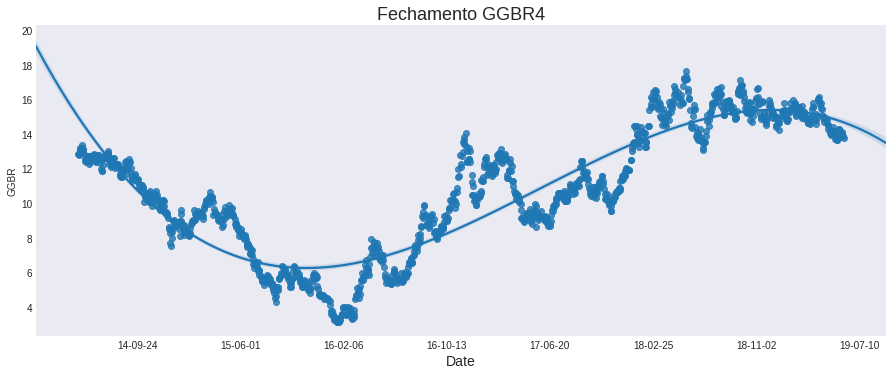

In [324]:

lm = sns.lmplot('DateAsNumber', 'GGBR', data=table, aspect=2.5, order=3)
lm.ax.xaxis.set_major_formatter(mdates.DateFormatter('%y-%m-%d'))
lm.ax.set_xlabel('Date', fontsize = 14)
plt.title('Fechamento GGBR4', fontsize = 18)

Text(0.5,1,'Fechamento ABEV3')

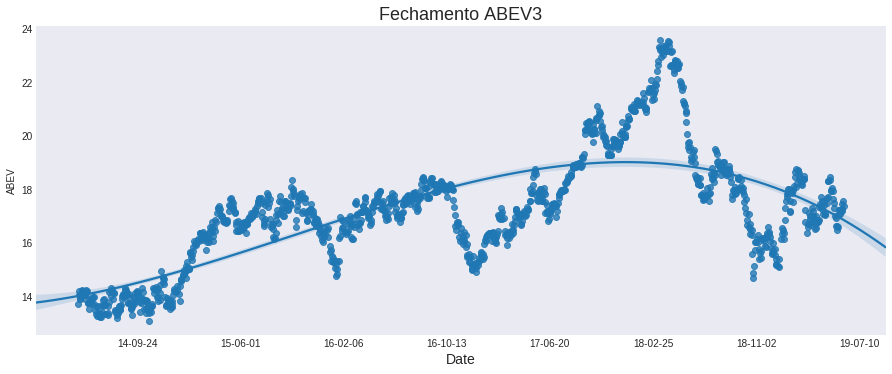

In [325]:

lm = sns.lmplot('DateAsNumber', 'ABEV', data=table, aspect=2.5, order=3)
lm.ax.xaxis.set_major_formatter(mdates.DateFormatter('%y-%m-%d'))
lm.ax.set_xlabel('Date', fontsize = 14)
plt.title('Fechamento ABEV3', fontsize = 18)

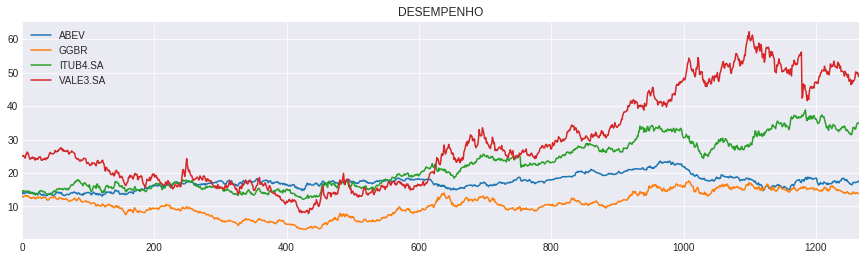

In [334]:
table[['ABEV', 'GGBR','ITUB4.SA', 'VALE3.SA']].plot(figsize=(15, 4), title='DESEMPENHO', grid=True)

In [327]:
# Média movel de 14 dias do Fechamento
table['MovingMean14'] = table.GGBR.rolling(14).mean()
# Média movel de 30 dias do Fechamento
table['MovingMean30'] = table.GGBR.rolling(30).mean()
# Retorno diário percentual
table['DailyReturn'] = table.GGBR.pct_change()
table.tail()

,Date,GGBR,ABEV,ITUB4.SA,VALE3.SA,DateAsNumber,MovingMean14,MovingMean30,DailyReturn
1261,2019-05-28,14.14,17.200001,34.065395,50.110001,737207.0,13.940930,14.218606,0.023155
1262,2019-05-29,14.05,17.260000,34.705120,49.700001,737208.0,13.932541,14.196782,-0.006365
1263,2019-05-30,13.95,17.430000,34.955013,50.009998,737209.0,13.923404,14.161677,-0.007117
1264,2019-05-31,13.87,17.549999,34.985001,49.000000,737210.0,13.932715,14.127220,-0.005735
1265,2019-06-03,13.79,17.360001,34.830002,48.750000,737213.0,13.926363,14.091756,-0.005768


Text(0.5,1,'Médias Móveis GGBR')

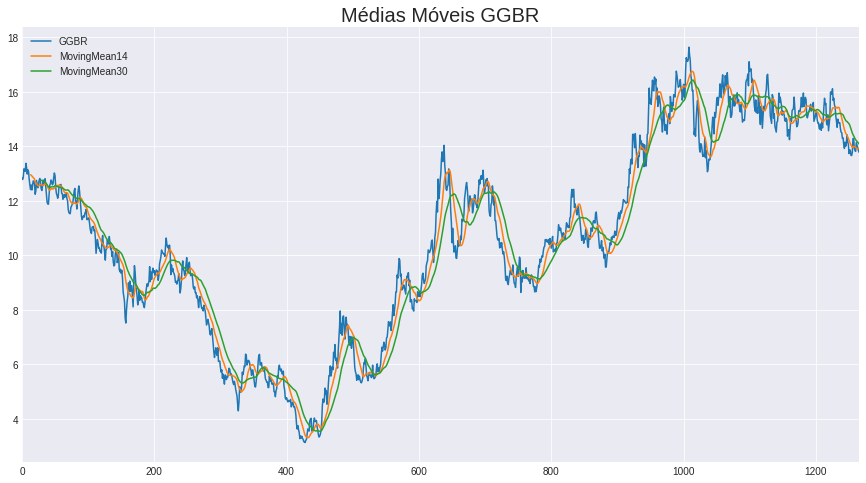

In [328]:
columns = ['GGBR','MovingMean14', 'MovingMean30']
graph = table[columns].plot(figsize=(15, 8), grid=True)
plt.title("Médias Móveis GGBR", fontsize = 20)

Text(0.5,1,'Distribuição dos Retornos GGBR4')

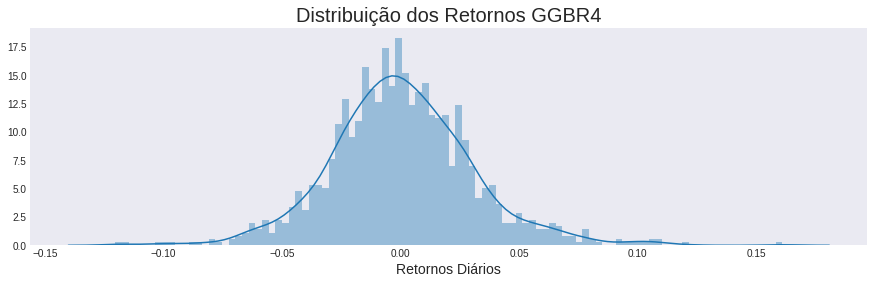

In [329]:
fig, ax1 = plt.subplots(1, 1, figsize=(15, 4))
sns.distplot(table.DailyReturn.dropna(), bins=100, ax=ax1)
plt.xlabel("Retornos Diários", fontsize = 14)
plt.title("Distribuição dos Retornos GGBR4", fontsize = 20)

In [330]:
# Média movel de 14 dias do Fechamento
table['MovingMean14'] = table.ABEV.rolling(14).mean()
# Média movel de 30 dias do Fechamento
table['MovingMean30'] = table.ABEV.rolling(30).mean()
# Retorno diário percentual
table['DailyReturn'] = table.ABEV.pct_change()
table.tail()

,Date,GGBR,ABEV,ITUB4.SA,VALE3.SA,DateAsNumber,MovingMean14,MovingMean30,DailyReturn
1261,2019-05-28,14.14,17.200001,34.065395,50.110001,737207.0,17.004286,17.431667,-0.001161
1262,2019-05-29,14.05,17.260000,34.705120,49.700001,737208.0,16.987857,17.426333,0.003488
1263,2019-05-30,13.95,17.430000,34.955013,50.009998,737209.0,16.997143,17.423000,0.009849
1264,2019-05-31,13.87,17.549999,34.985001,49.000000,737210.0,17.035714,17.439667,0.006885
1265,2019-06-03,13.79,17.360001,34.830002,48.750000,737213.0,17.065714,17.449000,-0.010826


Text(0.5,1,'Médias Móveis ABEV')

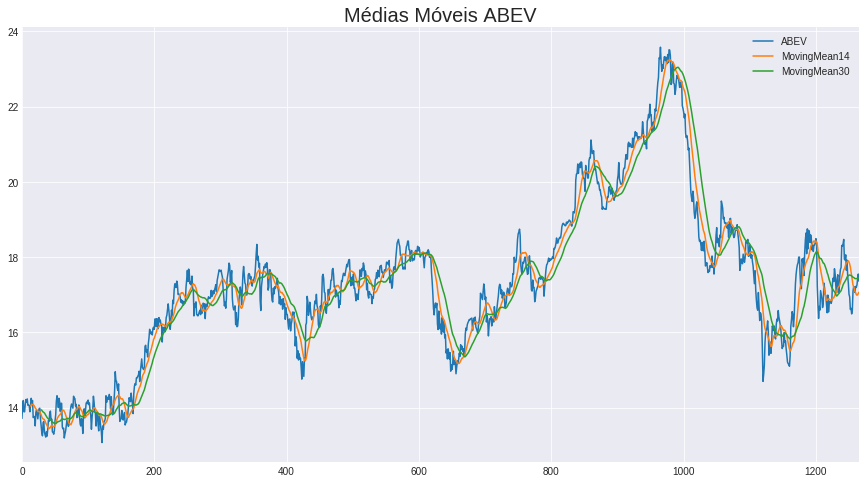

In [331]:
columns = ['ABEV','MovingMean14', 'MovingMean30']
graph = table[columns].plot(figsize=(15, 8), grid=True)
plt.title("Médias Móveis ABEV", fontsize = 20)

Text(0.5,1,'Distribuição dos Retornos ABEV3')

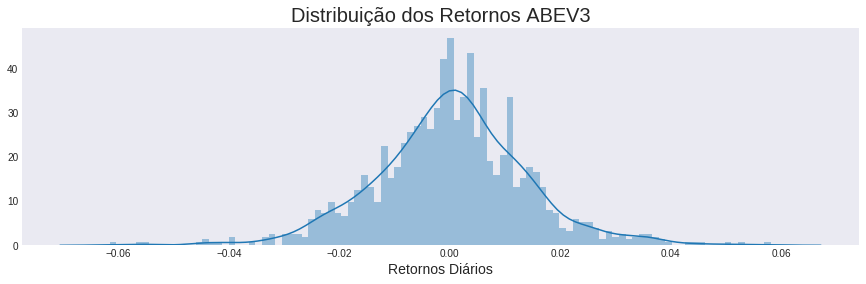

In [332]:
fig, ax1 = plt.subplots(1, 1, figsize=(15, 4))
sns.distplot(table.DailyReturn.dropna(), bins=100, ax=ax1)
plt.xlabel("Retornos Diários", fontsize = 14)
plt.title("Distribuição dos Retornos ABEV3", fontsize = 20)

In [335]:
# REFORMATANDO
table = pf_data

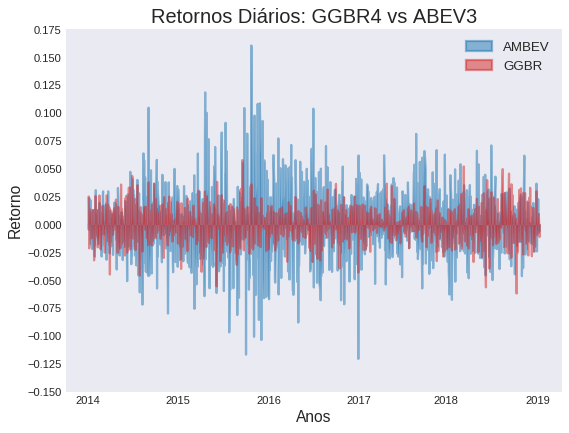

In [336]:
# PLOTANDO OS RETORNOS DIÁRIOS
df = pd.DataFrame(retorno_diario)
df['date'] = df.index



x = df['date']
y1 = df['GGBR4.SA'].values.tolist()
y2 = df['ABEV3.SA'].values.tolist()
mycolors = ['tab:red', 'tab:blue', 'tab:green', 'tab:orange', 'tab:brown', 'tab:grey', 'tab:pink', 'tab:olive'] 
columns = ['GGBR', 'AMBEV']

fig, ax = plt.subplots(1, 1, figsize=(8,6), dpi=80)
ax.fill_between(x, y1=y1, y2=0, label=columns[1], alpha=0.5, color=mycolors[1], linewidth=2)
ax.fill_between(x, y1=y2, y2=0, label=columns[0], alpha=0.5, color=mycolors[0], linewidth=2)
ax.legend(loc='best', fontsize=12)

plt.ylabel('Retorno', fontsize = 14)
plt.xlabel('Anos', fontsize = 14)
plt.title('Retornos Diários: GGBR4 vs ABEV3', fontsize = 18)

plt.xticks(x[::252], fontsize=10, horizontalalignment='center')
plt.yticks(np.arange(-0.15, 0.2, 0.025), fontsize=10)

plt.show()


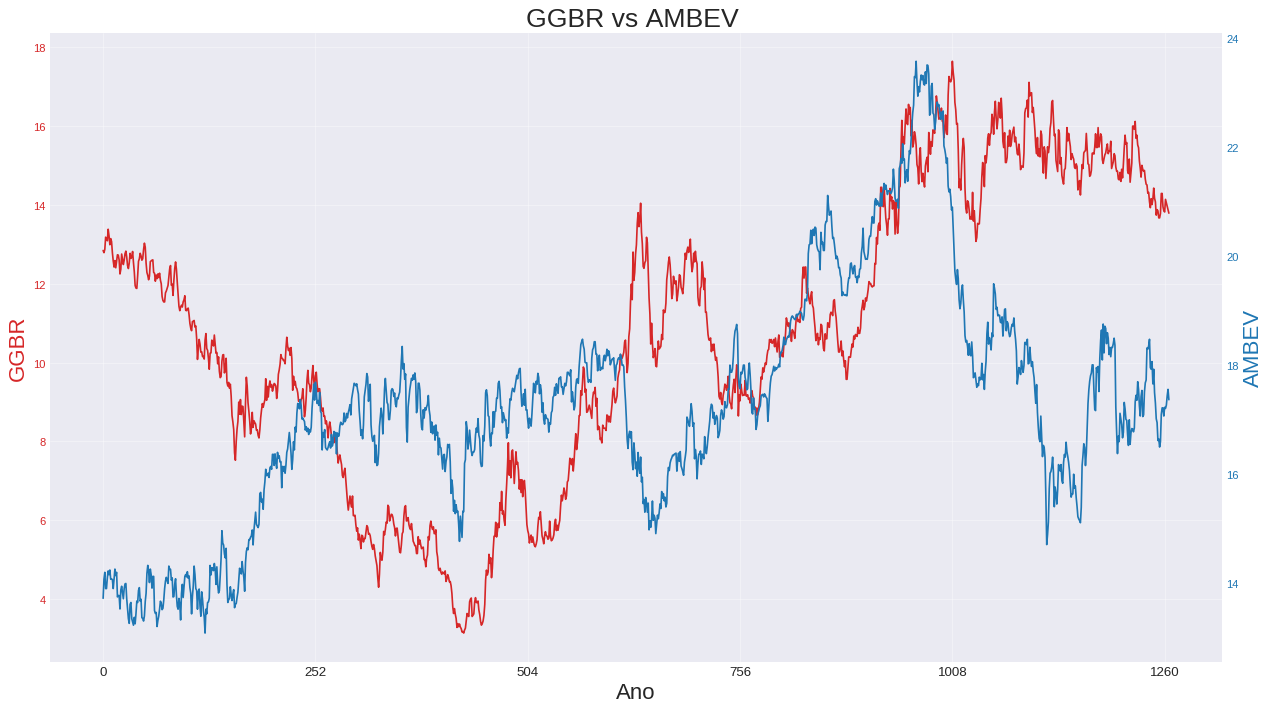

In [337]:
# PLOTANDO O COMPORTAMENTO DOS PAPEIS

df = table


df = df.rename(index=str, columns={"Date": "date", "GGBR4.SA": "psavert", "ABEV3.SA": "unemploy"})

x = df.index
y1 = df['psavert']
y2 = df['unemploy']


fig, ax1 = plt.subplots(1,1,figsize=(16,9), dpi= 80)
ax1.plot(x, y1, color='tab:red')

ax2 = ax1.twinx() 
ax2.plot(x, y2, color='tab:blue')


ax1.set_xlabel('Ano', fontsize=20)
ax1.tick_params(axis='x', rotation=0, labelsize=12)
ax1.set_ylabel('GGBR', color='tab:red', fontsize=20)
ax1.tick_params(axis='y', rotation=0, labelcolor='tab:red' )
ax1.grid(alpha=.4)


ax2.set_ylabel("AMBEV", color='tab:blue', fontsize=20)
ax2.tick_params(axis='y', labelcolor='tab:blue')
ax2.set_xticks(np.arange(0, len(x), 252))
ax2.set_xticklabels(x[::252], rotation=90, fontdict={'fontsize':1})
ax2.set_title("GGBR vs AMBEV ", fontsize=24)
fig.tight_layout()
plt.show()

In [338]:
# CALCULANDO A COVARIÂNCIA TANTO ANUAL QUANTO DIÁRIA DOS ATIVOS
cov_diaria = retorno_diario.cov()
cov_anual = cov_diaria * 252


In [339]:
# CRIANDO LISTAS ONDE SERÃO ARMAZENADAS A VOLATILIDADE E OS PESOS DOS PORTFOLIOS
port_retorno = []
port_volatilidade = []
sharpe_ratio = []
pesos_port = []

In [351]:
# ESTABELECENDO O NÚMERO DE CARTEIRAS A SEREM TESTADAS
num_ativos = len(ativos)
num_portfolios = 1000000
np.random.seed(101)

In [352]:
# PREENCHENDO AS LISTAS COM OS RETORNOS, DESVIO E PESOS
for x in range(num_portfolios):
    pesos = np.random.random(num_ativos)
    pesos /= np.sum(pesos)
    retornos = np.dot(pesos, retorno_anual)
    volatilidade = np.sqrt(np.dot(pesos.T, np.dot(cov_anual, pesos)))
    sharpe = retornos / volatilidade
    sharpe_ratio.append(sharpe)
    port_retorno.append(retornos)
    port_volatilidade.append(volatilidade)
    pesos_port.append(pesos)

In [353]:
# CRIANDO UM DICIONÁRIO PARA REGISTRAR OS DADOS QUE DEPOIS SERÃO TRANSFORMADOS EM DATAFRAME
portfolio = {'Retornos': port_retorno,
             'Volatilidade': port_volatilidade,
             'Sharpe Ratio': sharpe_ratio}

for counter,symbol in enumerate(ativos):
    portfolio[symbol+'Pesos'] = [pesos[counter] for pesos in pesos_port]

In [354]:
# CRIANDO DATAFRAME
df = pd.DataFrame(portfolio)

In [355]:
# FORMATANDO A SAÍDA DOS DADOS
colunas = ['Retornos', 'Volatilidade', 'Sharpe Ratio'] + [stock+'Pesos' for stock in ativos]


In [356]:
# FORMATANDO O DATAFRAME
df = df[colunas]

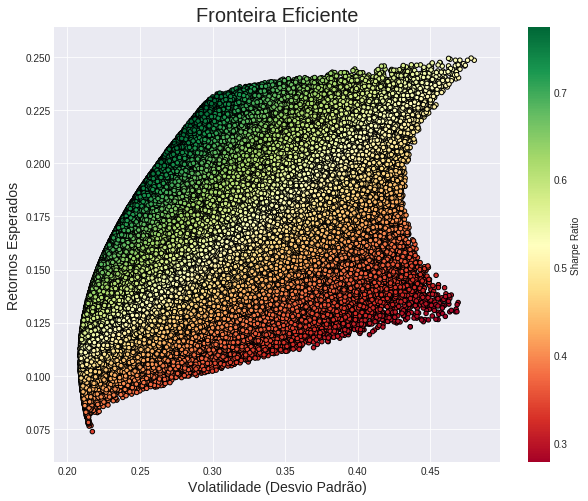

In [357]:
# PLOTANDO CARTEIRAS
plt.style.use('seaborn-dark')
df.plot.scatter(x='Volatilidade', y='Retornos', c='Sharpe Ratio',
                cmap='RdYlGn', edgecolors='black', figsize=(10, 8), grid=True)
plt.xlabel('Volatilidade (Desvio Padrão)', fontsize = 14)
plt.ylabel('Retornos Esperados', fontsize = 14)
plt.title('Fronteira Eficiente', fontsize = 20)
plt.show()

In [358]:
# ACHANDO VALORES QUE MINIMIZAM A VOLATILIDADE E MAXIMIZAM O SHARPE
min_volatilidade = df['Volatilidade'].min()
max_sharpe = df['Sharpe Ratio'].max()

In [359]:
# CRIANDO OS PORTFOLIOS ADEQUADOS
sharpe_portfolio = df.loc[df['Sharpe Ratio'] == max_sharpe]
min_variance_port = df.loc[df['Volatilidade'] == min_volatilidade]

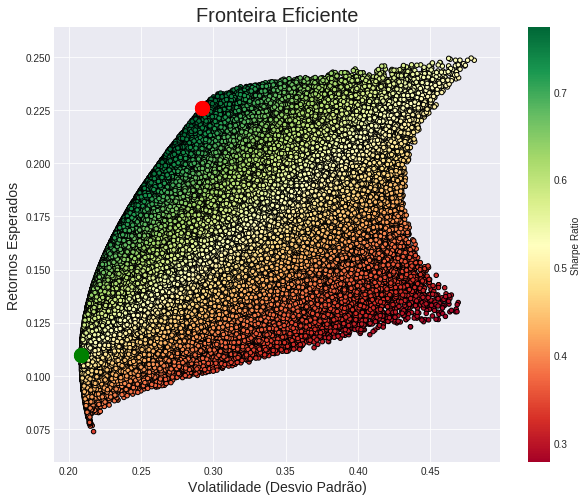

In [362]:
# PLOTANDO O GRÁFICO COM OS PORTFOLIOS DESTACADOS
plt.style.use('seaborn-dark')
df.plot.scatter(x='Volatilidade', y='Retornos', c='Sharpe Ratio',
                cmap='RdYlGn', edgecolors='black', figsize=(10, 8), grid=True)
plt.scatter(x=sharpe_portfolio['Volatilidade'], y=sharpe_portfolio['Retornos'], c='red', marker='o', s=200)
plt.scatter(x=min_variance_port['Volatilidade'], y=min_variance_port['Retornos'], c='green', marker='o', s=200 )
plt.xlabel('Volatilidade (Desvio Padrão)', fontsize = 14)
plt.ylabel('Retornos Esperados', fontsize = 14)
plt.title('Fronteira Eficiente', fontsize = 20)
plt.show()

In [361]:
# IMPRIMINDO OS DADOS DAS CARTEIRAS ÓTIMAS
print(min_variance_port.T)
print(sharpe_portfolio.T)

                 64066     164066
Retornos       0.109718  0.109718
Volatilidade   0.208700  0.208700
Sharpe Ratio   0.525721  0.525721
GGBR4.SAPesos  0.007077  0.007077
ABEV3.SAPesos  0.754252  0.754252
ITUB4.SAPesos  0.170259  0.170259
VALE3.SAPesos  0.068412  0.068412
                 89579     189579
Retornos       0.226148  0.226148
Volatilidade   0.292453  0.292453
Sharpe Ratio   0.773279  0.773279
GGBR4.SAPesos  0.000056  0.000056
ABEV3.SAPesos  0.031018  0.031018
ITUB4.SAPesos  0.704573  0.704573
VALE3.SAPesos  0.264352  0.264352
